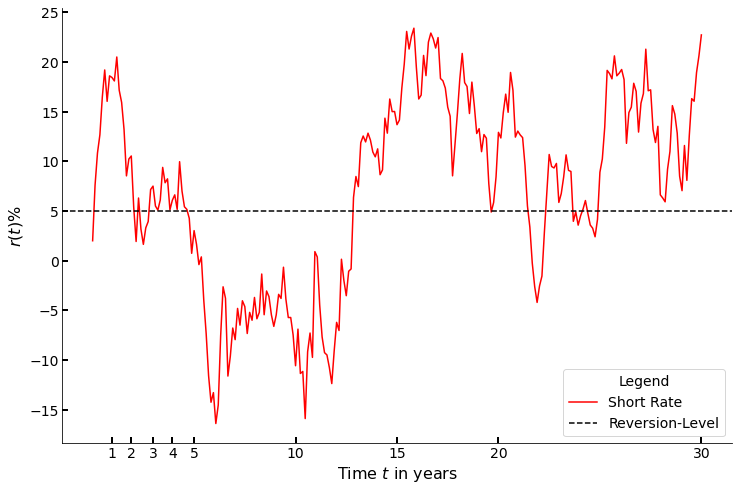

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def Vasicek(r0 = 0.02, kappa = 0.5, theta = 0.05, Volatility = 0.08, Time = 30,
        Steps = 252, Paths = 10, n_plots = 10):

    sigma = Volatility
    Np = Paths # number of paths
    Nt = Steps+1 # number of samples
    dt = Time/Steps
    z = np.random.normal(loc=0, scale=1, size = (Nt, Np)) # Continous standardized RV z = [0,1]
    
    r = np.zeros(shape = (Nt, Np))
    r[0] = r0
    
    for i in range(1, Nt):
        r[i] = r[i-1] + kappa*(theta-r[i-1])*dt + sigma*z[i]*np.sqrt(dt)

    fig, ax = plt.subplots(figsize = [12, 8]);
    ax.plot(r[:, :1]*100, color = 'red', label = 'Short Rate')
    #ax.plot(r[:, 2:n_plots]*100, color = 'grey')
    plt.ylabel('$r(t) \%$', fontsize = 16)
    plt.xlabel('Time $t$ in years', fontsize = 16)
    ax.spines[["right", "top"]].set_visible(False)
    times = np.array([1, 2, 3, 4, 5, 10, 15, 20, 30])
    x = (Steps*times/Time).astype(int)
    plt.xticks(x, [1, 2, 3, 4, 5, 10, 15, 20, 30], size = 14)
    plt.yticks(size = 14)
    ax.tick_params(direction = 'in', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=.1)
    

    ax.axhline(y=theta*100, color='k', linestyle='--', label = 'Reversion-Level')
    plt.legend(title = 'Legend', title_fontsize = 14, fontsize = 14);

    return r, dt

r = Vasicek();